In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot configuration.
sns.set_style('darkgrid')

In [2]:
# Load data.
train = pd.read_csv("input/train.csv")
test  = pd.read_csv("input/test.csv")

# Data Verification

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature description
| Variable | Definition                                      | Key                                            |
|:---------|:------------------------------------------------|:-----------------------------------------------|
| Survived | Survival                                        | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                                    | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Name     | Name                                            |                                                |
| Sex      | Sex                                             |                                                |
| Age      | Age in years                                    |                                                |
| SibSp    | Number of siblings / spouses aboard the Titanic |                                                |
| Parch    | Number of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                                   |                                                |
| Fare     | Passenger fare                                  |                                                |
| Cabin    | Cabin number                                    |                                                |
| Embarked | Port of Embarkation                             | C = Cherbourg, Q = Queenstown, S = Southampton |

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mineff, Mr. Ivan",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Riordan, Miss. Johanna Hannah""""",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


## Unique values

In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## Null values
Cabin has many null values.

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data visualization

In [13]:
def show_data_info_histogram(feature):
    plt.figure(figsize=(5, 5))
    data = train[feature]
    count = data.value_counts()
    frequency = data.value_counts(normalize=True)
    sns.distplot(data, kde=False, hist_kws={"alpha": 1, "color": "#3274a1"})
    plt.title('Histogram')
    return pd.DataFrame({'Count': count, 'Frequency': frequency}).sort_values(by='Frequency', ascending=False)

def show_data_info_countplot(feature):
    plt.figure(figsize=(5, 5))
    data = train[feature]
    count = data.value_counts(sort=False)
    frequency = data.value_counts(normalize=True, sort=False)
    for i in range(len(count)):
        plt.annotate("{}\n({:.2f})".format(count.iloc[i], frequency.iloc[i]), 
                     xy = (i, count.iloc[i] * 1.005 ), ha='center')
    sns.countplot(x=feature, data=train, order=count.index)
    return pd.DataFrame({'Count': count, 'Frequency': frequency})

,Count,Frequency
0,549,0.616162
1,342,0.383838


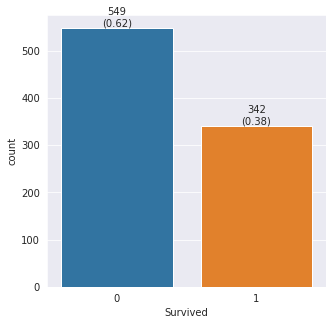

In [14]:
show_data_info_countplot('Survived')

,Count,Frequency
1,216,0.242424
2,184,0.206510
3,491,0.551066


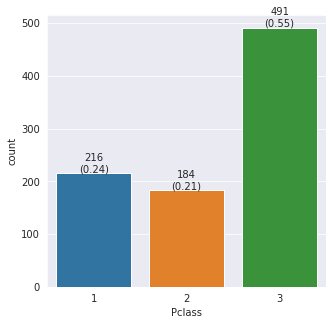

In [15]:
show_data_info_countplot('Pclass')

,Count,Frequency
female,314,0.352413
male,577,0.647587


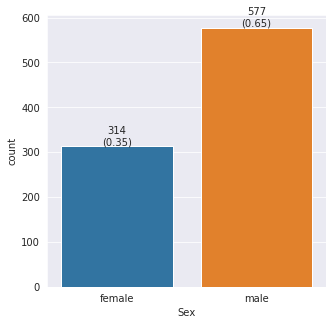

In [16]:
show_data_info_countplot('Sex')

,Count,Frequency
24.00,30,0.042017
22.00,27,0.037815
18.00,26,0.036415
19.00,25,0.035014
30.00,25,0.035014
...,...,...
14.50,1,0.001401
0.67,1,0.001401
24.50,1,0.001401
20.50,1,0.001401


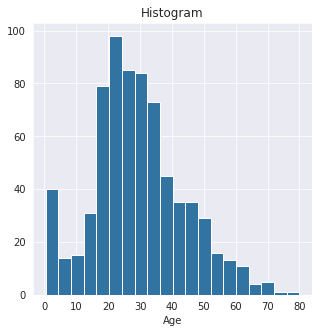

In [17]:
show_data_info_histogram('Age')

,Count,Frequency
0,608,0.682379
1,209,0.234568
2,28,0.031425
3,16,0.017957
4,18,0.020202
5,5,0.005612
8,7,0.007856


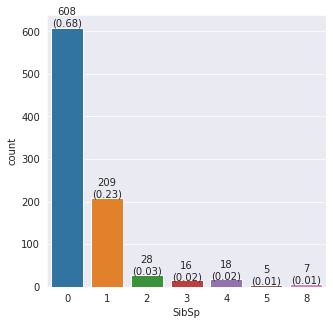

In [18]:
show_data_info_countplot('SibSp')

,Count,Frequency
0,678,0.760943
1,118,0.132435
2,80,0.089787
3,5,0.005612
4,4,0.004489
5,5,0.005612
6,1,0.001122


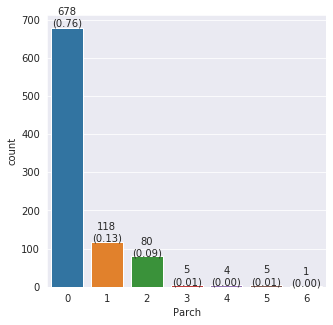

In [19]:
show_data_info_countplot('Parch')

,Count,Frequency
8.0500,43,0.048260
13.0000,42,0.047138
7.8958,38,0.042649
7.7500,34,0.038159
26.0000,31,0.034792
...,...,...
7.7875,1,0.001122
6.4500,1,0.001122
21.6792,1,0.001122
7.7417,1,0.001122


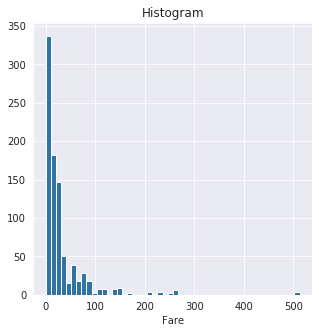

In [20]:
show_data_info_histogram('Fare')

,Count,Frequency
C,168,0.188976
Q,77,0.086614
S,644,0.724409


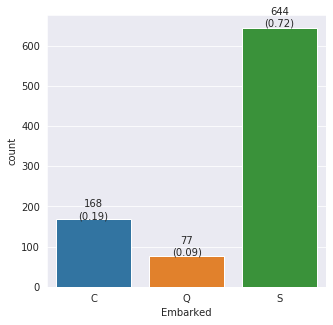

In [21]:
show_data_info_countplot('Embarked')

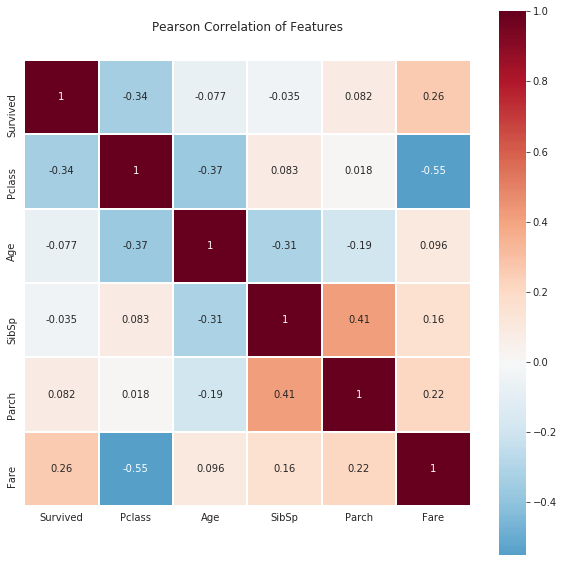

In [22]:
train_corr = train.drop('PassengerId', axis=1).corr()
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=12)
sns.heatmap(train_corr, square=True, cmap='RdBu_r', 
            annot=True, lw=1, center=0.0);

In [23]:
def show_survival_chance(feature1):
    return train[[feature1, 'Survived']].groupby([feature1], as_index=False) \
    .mean().sort_values(by='Survived', ascending=False)

def show_bar_plot(feature1, feature2):
    sns.catplot(x=feature1, y=feature2, data=train, kind='bar', 
                height=5, aspect=1, capsize=0.1, errwidth=1.2)

,Sex,Survived
0,female,0.742038
1,male,0.188908


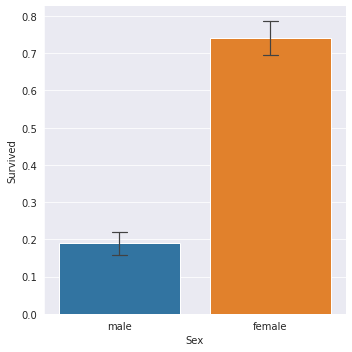

In [24]:
show_bar_plot('Sex', 'Survived')
show_survival_chance('Sex')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


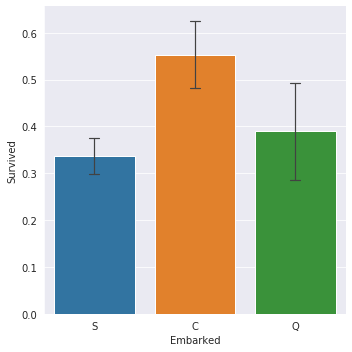

In [25]:
show_bar_plot('Embarked', 'Survived')
show_survival_chance('Embarked')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


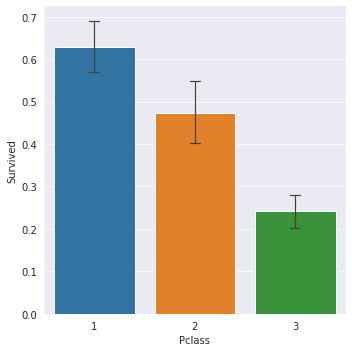

In [26]:
show_bar_plot('Pclass', 'Survived')
show_survival_chance('Pclass')

# Fill null values

In [27]:
def guess_age(df):
    grouped_indices = df[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).indices

    for index_list in grouped_indices.values():
        mean_age = df.iloc[np.array(index_list)]['Age'].mean()
        for index in index_list:
            if pd.isnull(df.iloc[index]['Age']):
                df.at[index, 'Age'] = mean_age

In [28]:
print('Before:\n{}'.format(train['Age'].describe()))

guess_age(train)
guess_age(test)
   
print('##################')
print('After:\n{}'.format(train['Age'].describe()))

Before:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
##################
After:
count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64


In [29]:
mode = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(mode)

In [30]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Data wrangling

## New feature: Fare bin
### Equal-sized buckets based on sample quantiles

In [33]:
train['Fare_bin'] = pd.qcut(train['Fare'], q=8)
train['Fare_bin'].value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare_bin, dtype: int64

In [34]:
test['Fare_bin'] = pd.qcut(test['Fare'], q=8)
test['Fare_bin'].value_counts()

(-0.001, 7.75]      70
(23.375, 31.5]      54
(31.5, 69.55]       52
(7.896, 10.5]       52
(69.55, 512.329]    51
(14.454, 23.375]    51
(10.5, 14.454]      44
(7.75, 7.896]       44
Name: Fare_bin, dtype: int64

,Fare_bin,Survived
7,"(69.488, 512.329]",0.678571
6,"(31.0, 69.488]",0.481818
5,"(24.479, 31.0]",0.473214
4,"(14.454, 24.479]",0.436364
3,"(9.841, 14.454]",0.407080
0,"(-0.001, 7.75]",0.207143
2,"(7.91, 9.841]",0.198198
1,"(7.75, 7.91]",0.180723


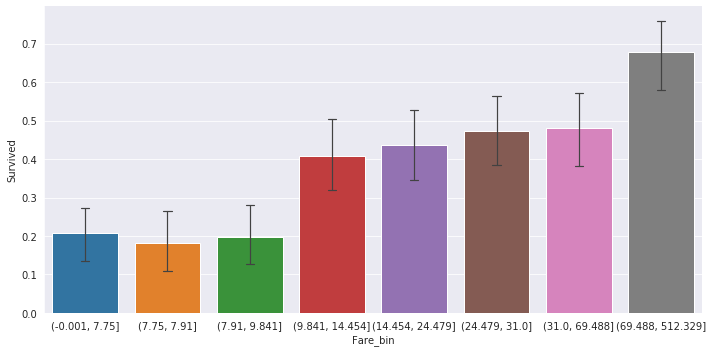

In [35]:
sns.catplot(x='Fare_bin', y='Survived', data=train, kind='bar', 
                height=5, aspect=2, capsize=0.1, errwidth=1.2)
show_survival_chance('Fare_bin')

## New feature: Age bin
### Age bin size = 5

In [36]:
train['Age_bin'] = pd.cut(train['Age'], bins=np.arange(0, 90, 5), right=False)
train['Age_bin'].value_counts()

[25, 30)    202
[20, 25)    156
[30, 35)    113
[15, 20)     86
[35, 40)     72
[40, 45)     69
[45, 50)     41
[0, 5)       40
[50, 55)     32
[5, 10)      22
[55, 60)     16
[10, 15)     16
[60, 65)     15
[70, 75)      6
[65, 70)      4
[80, 85)      1
[75, 80)      0
Name: Age_bin, dtype: int64

In [37]:
test['Age_bin'] = pd.cut(test['Age'], bins=np.arange(0, 90, 5), right=False)
test['Age_bin'].value_counts()

[20, 25)    143
[25, 30)     54
[30, 35)     41
[40, 45)     30
[15, 20)     30
[35, 40)     28
[45, 50)     25
[60, 65)     12
[10, 15)     11
[0, 5)       11
[50, 55)     11
[55, 60)     11
[5, 10)       9
[75, 80)      1
[65, 70)      1
[70, 75)      0
[80, 85)      0
Name: Age_bin, dtype: int64

,Age_bin,Survived
16,"[80, 85)",1.000000
0,"[0, 5)",0.675000
1,"[5, 10)",0.500000
7,"[35, 40)",0.458333
6,"[30, 35)",0.451327
2,"[10, 15)",0.437500
10,"[50, 55)",0.437500
4,"[20, 25)",0.410256
12,"[60, 65)",0.400000
3,"[15, 20)",0.395349


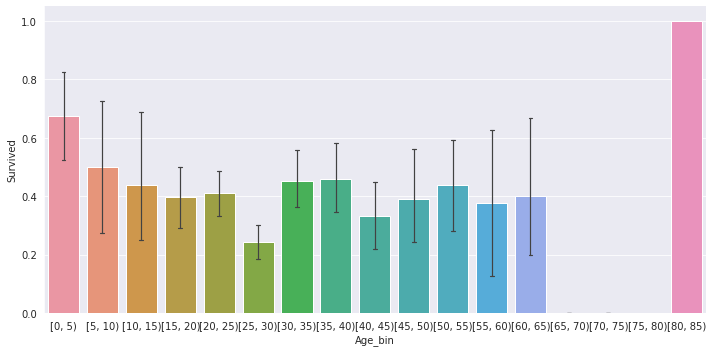

In [38]:
sns.catplot(x='Age_bin', y='Survived', data=train, height=5, aspect=2, 
            kind="bar", capsize=0.1, errwidth=1.2);
show_survival_chance('Age_bin')

## New feature: Title
### Title extracted from Name column.

In [39]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Don           1
Countess      1
Mme           1
Name: Title, dtype: int64

In [40]:
train[train['Title'] == 'Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Age_bin,Title
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,NaN,S,"(9.841, 14.454]","[25, 30)",Ms


In [41]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [42]:
test[test['Title'] == 'Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Age_bin,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,23.0734,0,0,364856,7.75,NaN,Q,"(-0.001, 7.75]","[20, 25)",Ms


### Group rare titles

In [43]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 
                                         'Countess', 'Jonkheer', 'Don', 'Lady', 'Sir'], 'Other')

# Mlle = Mademoiselle -> Miss.
train['Title'] = train['Title'].replace('Mlle', 'Miss')
# Reynaldo, Ms. Encarnacion was alone -> Miss.
train['Title'] = train['Title'].replace('Ms', 'Miss')
# Mme = Madame -> Mrs.
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [44]:
test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Col', 'Dona'], 'Other')

# O'Donoghue, Ms. Bridget was alone -> Miss.
test['Title'] = test['Title'].replace('Ms', 'Miss')

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Other,0.347826
2,Mr,0.156673


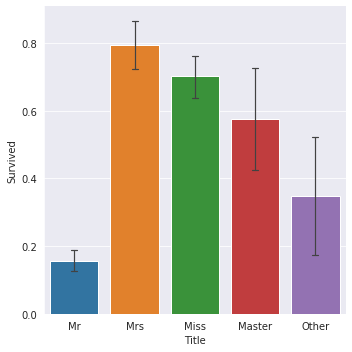

In [45]:
show_bar_plot('Title', 'Survived')
show_survival_chance('Title')

# New feature: Family_size

In [46]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1
train['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [47]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1
test['Family_size'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family_size, dtype: int64

,Family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


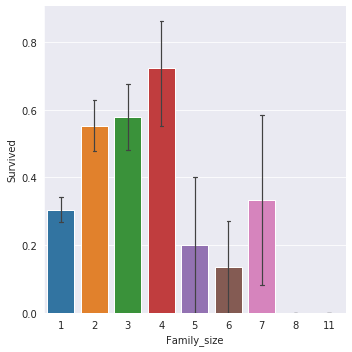

In [48]:
train[['Family_size', 'Survived']].groupby(['Family_size'], as_index=False).mean().sort_values(by='Survived', ascending=False)
show_bar_plot('Family_size', 'Survived')
show_survival_chance('Family_size')

# New feature: Age * Pclass

In [49]:
train['Age * Pclass'] = train['Age'] * train['Pclass']
test['Age * Pclass'] = test['Age'] * test['Pclass']

# Encode categorical data
Convert string feature to number

In [50]:
features = ['Sex', 'Title', 'Embarked', 'Age_bin', 'Fare_bin']

for feature in features:
    train[feature] = train[feature].astype('category')
    train[feature] = train[feature].cat.codes
    test[feature] = test[feature].astype('category')
    test[feature] = test[feature].cat.codes

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Age_bin,Title,Family_size,Age * Pclass
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,4,2,2,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,7,7,3,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,5,1,1,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,6,7,3,2,35.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,7,2,1,105.0


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Age_bin,Title,Family_size,Age * Pclass
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,1,6,2,1,103.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,0,9,3,2,141.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,2,12,2,1,124.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,2,5,2,1,81.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,3,4,3,3,66.0


## Select features to use

In [52]:
predictors = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare_bin', 'Age_bin', 'Title', 'Family_size', 'Age * Pclass']
train[predictors].head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Fare_bin,Age_bin,Title,Family_size,Age * Pclass
0,0,3,1,1,0,2,0,4,2,2,66.0
1,1,1,0,1,0,0,7,7,3,2,38.0
2,1,3,0,0,0,2,2,5,1,1,78.0
3,1,1,0,1,0,2,6,7,3,2,35.0
4,0,3,1,0,0,2,2,7,2,1,105.0


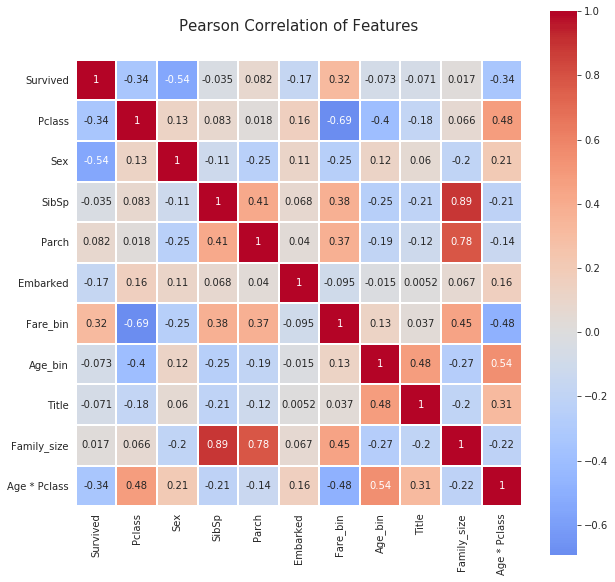

In [53]:
train_corr = train[predictors].corr()
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_corr, square=True, cmap='coolwarm', 
            annot=True, lw=1, center=0.0);

# Prediction

In [54]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [55]:
X_train = train[predictors].drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test[predictors[1:]] # test doesn't have 'Survived' feature.

In [56]:
models = []

models.append(("LogisticRegression", LogisticRegression(max_iter=500)))
models.append(("SVC", SVC(random_state=0)))
models.append(("KNeighbors", KNeighborsClassifier()))
models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("Perceptron", Perceptron()))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=0)))
models.append(("RandomForest", RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)))

In [57]:
results = []
names = []
for name, model in models:
    result = cross_val_score(model, X_train, y_train, cv=3)
    names.append(name)
    results.append(result)
    
scores = pd.DataFrame(results, index=names)
scores['Mean'] = scores.mean(axis=1)
scores.sort_values(by='Mean', ascending=False)

,0,1,2,Mean
RandomForest,0.797980,0.841751,0.821549,0.820426
LogisticRegression,0.787879,0.804714,0.801347,0.797980
Gaussian Naive Bayes,0.754209,0.774411,0.821549,0.783389
DecisionTree,0.760943,0.794613,0.754209,0.769921
KNeighbors,0.683502,0.771044,0.750842,0.735129
Perceptron,0.653199,0.717172,0.808081,0.726150
SVC,0.643098,0.717172,0.713805,0.691358


## Predict using Random Forest and create submission file

In [58]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived': predictions
    })
submission.to_csv('output/submission.csv', index=False)

In [59]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


---
## Show feature importance (Random Forrest)

In [60]:
feature_importances = pd.DataFrame([X_train.columns, clf.feature_importances_]).T
feature_importances.columns = ['Feature', 'Importance']
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
9,Age * Pclass,0.241823
1,Sex,0.191143
7,Title,0.129585
5,Fare_bin,0.110329
6,Age_bin,0.0933715
0,Pclass,0.0773279
8,Family_size,0.0547558
2,SibSp,0.0419079
4,Embarked,0.0383902
3,Parch,0.0213676


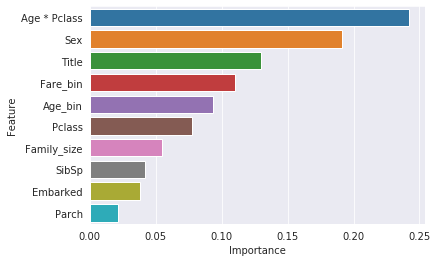

In [61]:
f = feature_importances.sort_values(['Importance'], ascending=False)
sns.barplot(x=f['Importance'], y=f['Feature']);